<a href="https://www.kaggle.com/sanjayanbu/uci-spam-detection?scriptVersionId=88710425" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing required libraries

In [1]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

## Reading and preprocesing the data

In [2]:
input_data = pd.read_csv("../input/uci-sms-spam-collection-data-set/SMSSpamCollection", delimiter="\t", names=['label', 'message'])

In [3]:
input_data["label"].replace({"spam":0, "ham":1}, inplace=True)
message_list = input_data['message'].values
labels = input_data['label'].values
corpus = []
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [4]:
for message in message_list:
    transformed_message = re.sub("[^A-Za-z ]", "", message).lower()
    transformed_message = " ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(transformed_message) if word not in stopwords.words("english")])
    corpus.append(transformed_message)

## TF IDF Vectorization

In [5]:
tf_idf_vectorizer = TfidfVectorizer()
train_data = tf_idf_vectorizer.fit_transform(corpus).toarray()

In [6]:
train_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Model building and evaluation

In [7]:
x_train, x_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.2, random_state=1)

In [8]:
mb_classifier = MultinomialNB()

In [9]:
cv = GridSearchCV(mb_classifier, {})
train_model = cv.fit(x_train, y_train)
best_model = train_model.best_estimator_
y_predict = best_model.predict(x_test)

## Model Evaluation

In [10]:
confusion_matrix(y_test, y_predict)

array([[112,  35],
       [  0, 968]])

<AxesSubplot:>

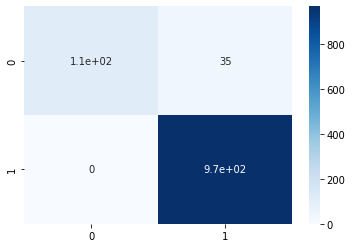

In [11]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap="Blues")

In [12]:
accuracy_score(y_test, y_predict)

0.968609865470852